## Solving Differential Equations for Swinging Atwood Machine (SAM)

This is a rough draft of the code eventually used for the final project.  The equations we are solving are:

$
\begin{align*}
\dot{\theta} = \frac{\partial \mathscr{H}}{\partial p_{\theta}} = \frac{p_{\theta}}{m_{1}\,r^{2}} \qquad&\qquad\qquad \dot{p_{\theta}} = -\frac{\partial \mathscr{H}}{\partial \theta} = -m_{1}\,g\,r\,\sin{\theta} \\
\dot{r} = \frac{\partial \mathscr{H}}{\partial p_{r}} = \frac{p_{r}}{(m_{1}+m_{2})} \qquad&\qquad\qquad \dot{p_{r}} = -\frac{\partial \mathscr{H}}{\partial r} = \frac{p_{\theta}^{2}}{m_{1}\,r^{3}} \,-\, m_{2}\,g \,+\, m_{1}\,g\,\cos{\theta} \\
\end{align*}
$

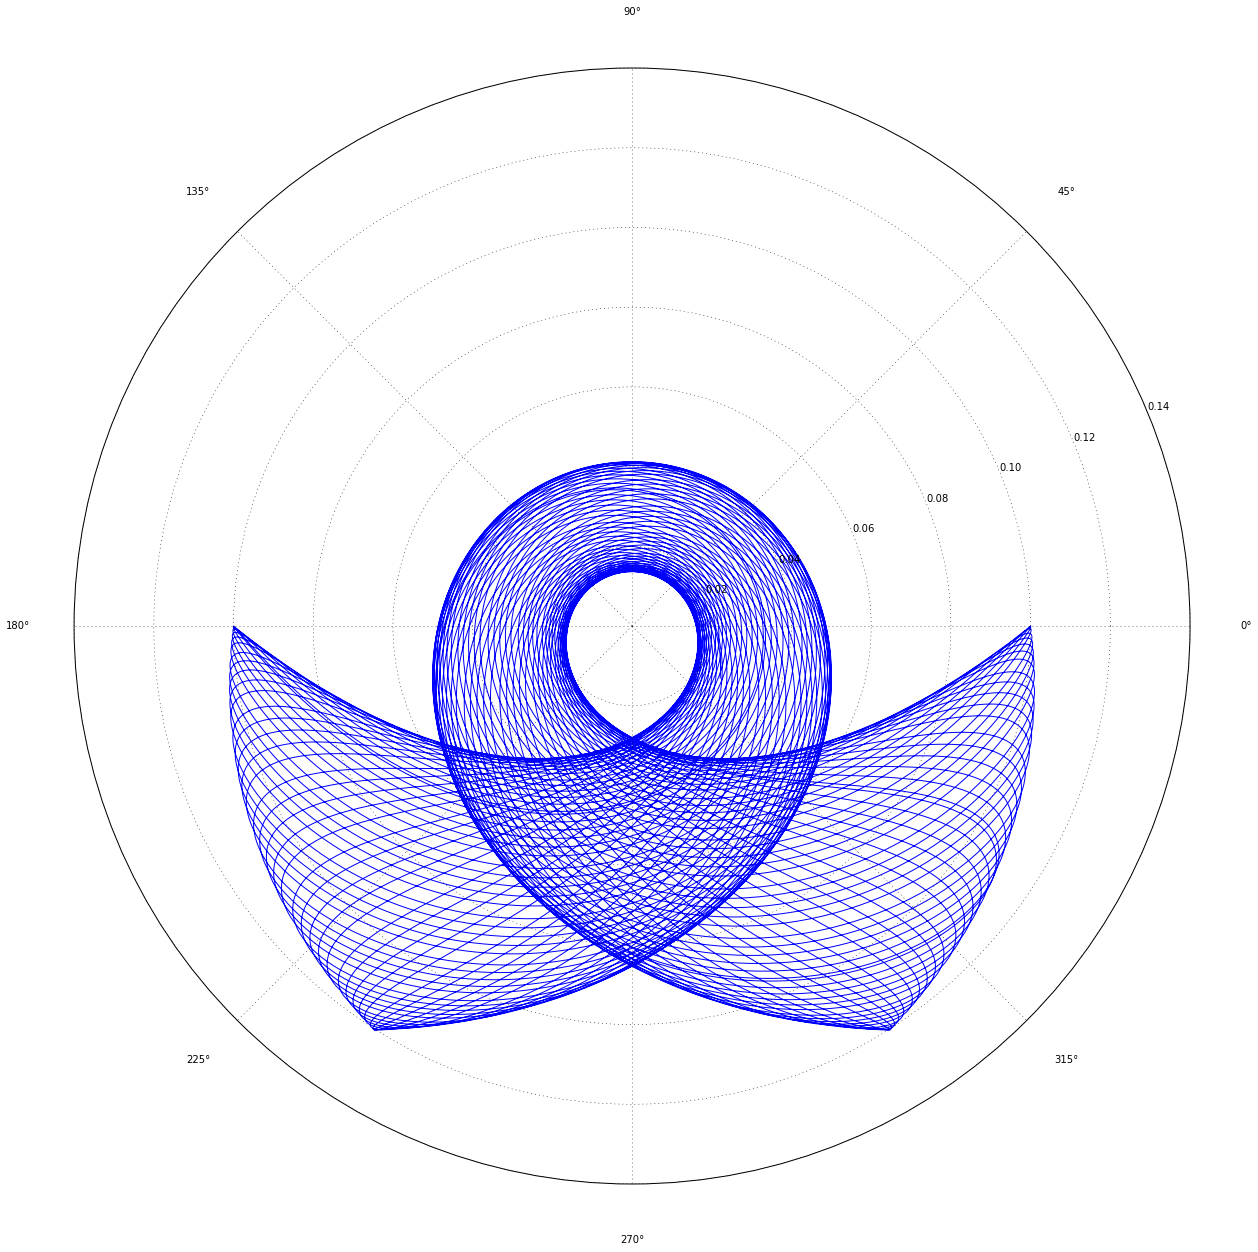

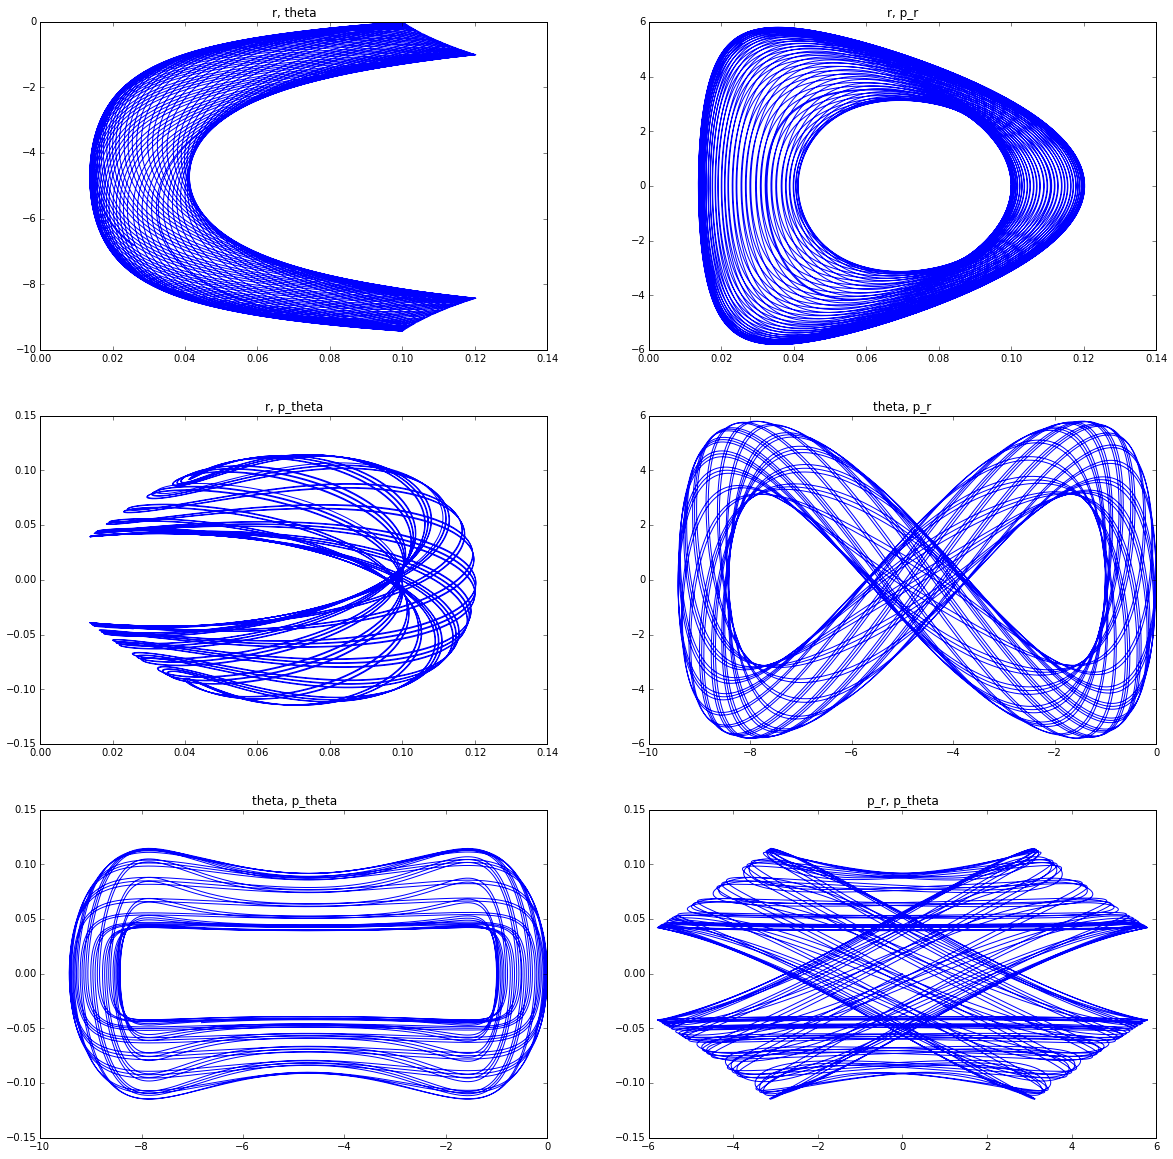

In [30]:
import numpy as np
import math
import scipy
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.cm as cmx
cmap = cmx.get_cmap('spring')

cool = cm = plt.get_cmap('spring') 
cNorm  = colors.Normalize(0., 31)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cool)

g = 9.8

def dtheta(theta, r, p_theta, p_r, m1, m2):
    return p_theta / (m1 * (r**2))
def dr(theta, r, p_theta, p_r, m1, m2):
    return p_r / (m1 + m2)
def dp_theta(theta, r, p_theta, p_r, m1, m2):
    return (-1 * m1 * g * r * np.sin(theta))
def dp_r(theta, r, p_theta, p_r, m1, m2):
    return ((p_theta**2) / (m1 * r**3)) - (m2 * g) + (m1 * g * np.cos(theta))

def dervs(state, t, m1, m2):
    theta, r, p_theta, p_r = state
    return [dtheta(theta, r, p_theta, p_r, m1, m2),
            dr(theta, r, p_theta, p_r, m1, m2),
            dp_theta(theta, r, p_theta, p_r, m1, m2),
            dp_r(theta, r, p_theta, p_r, m1, m2)]

def Solve_SAM(m1, m2, theta0, r0, p_theta0, p_r0, deriv, tf, dt):
    initial = [theta0, r0, p_theta0, p_r0]
    t = np.linspace(0,tf,round(tf/dt))
    soln_SAM = scipy.integrate.odeint(deriv, initial, t, args = (m1, m2,))
    return soln_SAM, t

checker = Solve_SAM(1., 5., np.pi / 2, .1, 0., 0., dervs, 25, .001)
r = checker[0][:,1]
theta = checker[0][:,0]
theta -= np.ones_like(theta)*np.pi/2
p_theta = checker[0][:,2]# % (2*np.pi)
t = checker[1]

plt.figure(figsize=(20,20))

ax = plt.subplot2grid((1,1), (0,0), projection='polar')
plt.plot(theta, r)
plt.show()

M = np.array([1.0025, 1.01003, 1.02264, 1.04043, 1.06352, 1.09207,
              1.12621, 1.1661, 1.21184, 1.2635, 1.32107, 1.38444,
              1.4534, 1.52765, 1.60673, 1.69009, 1.7771, 1.86702,
              1.95908, 2.05248, 2.14642, 2.2401, 2.33278, 2.42379,
              2.51248, 2.59835, 2.68093, 2.75988, 2.83497, 2.90608,
              2.97321])
theta0 = np.linspace(.1, 3.1, 31)


r = checker[0][:,1]
theta = checker[0][:,0]
p_r = checker[0][:,3]
p_theta = checker[0][:,2]

plt.figure(figsize=(20,20))

ax = plt.subplot2grid((3,2), (0,0))
plt.plot(r, theta)
plt.title('r, theta')

ax = plt.subplot2grid((3,2), (0,1))
plt.plot(r, p_r)
plt.title('r, p_r')

ax = plt.subplot2grid((3,2), (1,0))
plt.plot(r, p_theta)
plt.title('r, p_theta')

ax = plt.subplot2grid((3,2), (1,1))
plt.plot(theta, p_r)
plt.title('theta, p_r')

ax = plt.subplot2grid((3,2), (2,0))
plt.plot(theta, p_theta)
plt.title('theta, p_theta')

ax = plt.subplot2grid((3,2), (2,1))
plt.plot(p_r, p_theta)
plt.title('p_r, p_theta')

plt.show()

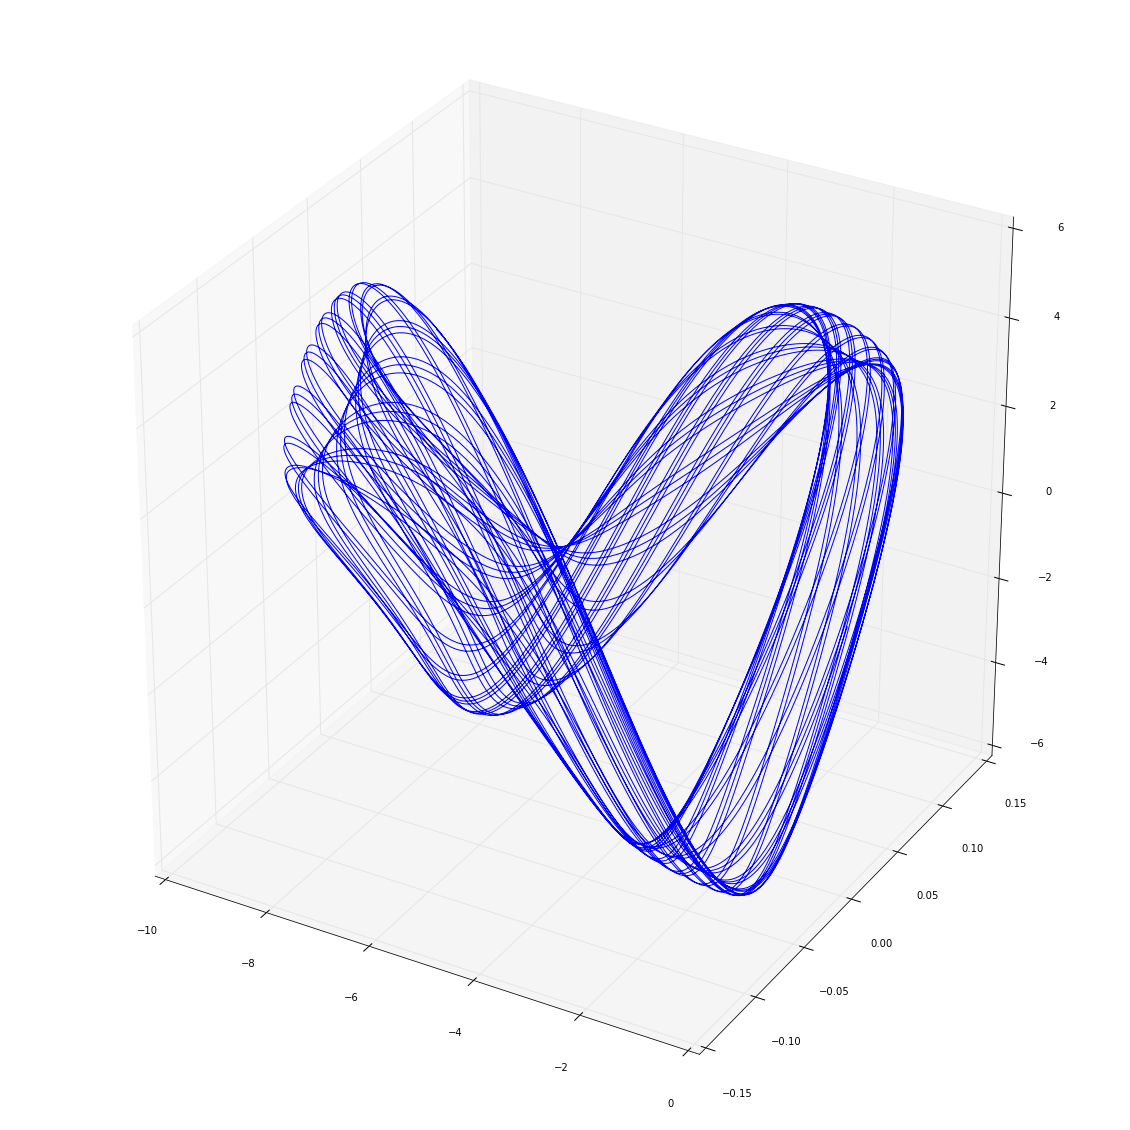

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot(theta, p_theta, p_r)
plt.show()


In [ ]:
plt.figure(figsize=(20,20))
ax = plt.subplot2grid((1,1), (0,0), projection='polar')
for i in range(len(M)):
    theta_nought = theta0[i]
    mass2 = M[i]
    checkering = Solve_SAM(1., mass2, theta_nought, .1, 0., 0., dervs, 1, .001)
    r = checkering[0][:,1]
    theta = checkering[0][:,0]
    theta -= np.ones_like(theta)*np.pi/2
    plt.plot(theta, r, color=scalarMap.to_rgba(i))

In [ ]:
r = checker[0][:,1]
theta = checker[0][:,0]
p_r = checker[0][:,3]
p_theta = checker[0][:,2]

In [ ]:
plt.figure(figsize=(20,20))

ax = plt.subplot2grid((3,2), (0,0))
plt.plot(r, theta)
plt.title('r, theta')

ax = plt.subplot2grid((3,2), (0,1))
plt.plot(r, p_r)
plt.title('r, p_r')

ax = plt.subplot2grid((3,2), (1,0))
plt.plot(r, p_theta)
plt.title('r, p_theta')

ax = plt.subplot2grid((3,2), (1,1))
plt.plot(theta, p_r)
plt.title('theta, p_r')

ax = plt.subplot2grid((3,2), (2,0))
plt.plot(theta, p_theta)
plt.title('theta, p_theta')

ax = plt.subplot2grid((3,2), (2,1))
plt.plot(p_r, p_theta)
plt.title('p_r, p_theta')

plt.show()

In [33]:
xxxx = [1,2,3]
xxxx.append(4)
xxxx

[1, 2, 3, 4]

In [102]:
#plt.plot(p_r)

def z_slice(X, Y, Z, z0):
    #print(Z)
    indices = []
    #print(np.min(Z))
    Z += np.ones_like(Z)*(-min(Z) - z0)
    #print((Z))
    for i in range(len(Z)-1):
        prior = Z[i]
        #print(prior)
        follw = Z[i+1]
        if follw == 0:
            if i != 0:
                indices.append(i)
        else:
            if i != 0:
                if (prior/follw) < 0:
                    indices.append(i)
    #print(indices)
    new_X = X[np.array(indices)]
    new_Y = Y[np.array(indices)]
    return new_X, new_Y

idk = z_slice(theta[::1050], p_theta[::1050], p_r[::1050], 10)

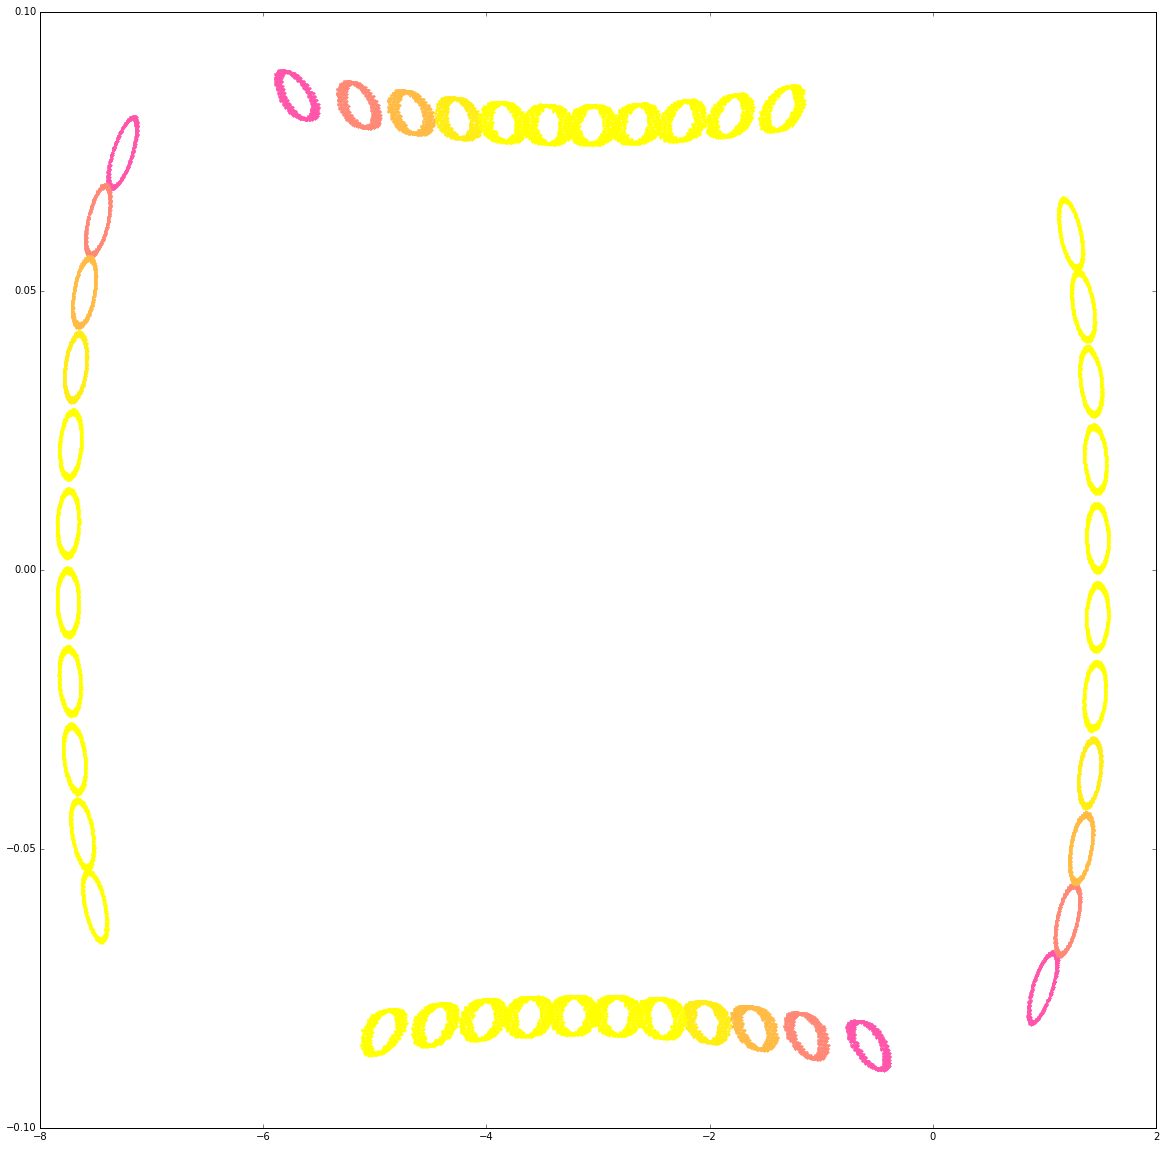

In [121]:
checker = Solve_SAM(1., 7.2, np.pi / 2, .1, 0., 0., dervs, 200, .001)

cool = cm = plt.get_cmap('spring') 
cNorm  = colors.Normalize(0., 15)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cool)

r = checker[0][:,1]
theta = checker[0][:,0]
p_r = checker[0][:,3]
p_theta = checker[0][:,2]

plt.figure(figsize=(20,20))
for i in range(11):
    idk = z_slice(theta, p_theta, p_r, 1+(i))
    plt.plot(idk[0], idk[1], '.',color=scalarMap.to_rgba(5+(3*i)))
plt.show()